In [1]:
import scipy
import json
import numpy as np
import pandas as pd
import pingouin as pg
import statsmodels.formula.api as sum
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from scipy.stats import f_oneway,mstats, levene, shapiro, shapiro, friedmanchisquare, wilcoxon, ttest_rel, ttest_ind
import glob
import matplotlib.pyplot as plt

In [2]:
df_sus_scales = pd.DataFrame()
df_sus_scales["P_D"]= [100,35,45,80,90,82.5,45,77.5,80,47.5,82.5,85,62.5,92.5,72.5,70,47.5,42.5,47.5]
df_sus_scales["P_C"]= [95,80,57.5,67.5,65,80,87.5,97.5,100,67.5,52.5,70,50,100,67.5,97.5,70,70,90]
df_sus_scales["P_GB"]= [75,77.5,95,65,95,85,95,87.5,75,85,72.5,100,100,52.5,70,62.5,95,82.5,57.5]
df_sus_scales["R_D"]= [67.5,52.5,92.5,67.5,90,40,75,80,65,50,92.5,45,45,30,50,32.5,75,70,92.5]
df_sus_scales["R_C"]= [72.5,100,92.5,45,92.5,55,85,75,85,85,85,97.5,60,65,85,100,75,87.5,70]
df_sus_scales["R_GB"]= [82.5,87.5,90,77.5,97.5,60,65,95,55,100,65,47.5,67.5,95,80,87.5,95,95,52.5]

In [3]:
df_sus_panel = df_sus_scales.loc[:,["P_D","P_C","P_GB"]]
df_sus_radial = df_sus_scales.loc[:,["R_D","R_C","R_GB"]]

df_sus_dwell = df_sus_scales.loc[:,["P_D","R_D"]].median(axis=1)
df_sus_cont = df_sus_scales.loc[:,["P_C","R_C"]].median(axis=1)
df_sus_gb = df_sus_scales.loc[:,["P_GB","R_GB"]].median(axis=1)

# df_single_plot = pd.DataFrame()
# df_single_plot["P"] = df_sus_radial
# df_single_plot["R"] = df_sus_radial
# df_single_plot["D"] = df_sus_dwell
# df_single_plot["C"] = df_sus_cont
# df_single_plot["GB"] = df_sus_gb

In [4]:
df_long = df_sus_scales.reset_index()
df_long = df_long.rename(columns={"index":"Users"})
df_long = pd.melt(df_long,id_vars=["Users"],value_vars=["P_D","P_C","P_GB","R_D","R_C","R_GB",], var_name="Condition",value_name="SUS_score")
df_long[["Menu_layout","Interaction_Type"]] = df_long["Condition"].str.split("_",expand=True)


In [5]:
df_long.head(25)

,Users,Condition,SUS_score,Menu_layout,Interaction_Type
0,0,P_D,100.0,P,D
1,1,P_D,35.0,P,D
2,2,P_D,45.0,P,D
3,3,P_D,80.0,P,D
4,4,P_D,90.0,P,D
5,5,P_D,82.5,P,D
6,6,P_D,45.0,P,D
7,7,P_D,77.5,P,D
8,8,P_D,80.0,P,D
9,9,P_D,47.5,P,D


In [6]:
df_sus_scales.head(1)

,P_D,P_C,P_GB,R_D,R_C,R_GB
0,100.0,95.0,75.0,67.5,72.5,82.5


## Means Std Medians

In [7]:
print("Means")
print("P_D: ", df_sus_scales["P_D"].mean(), " STD: ", df_sus_scales["P_D"].std())
print("P_C: ", df_sus_scales["P_C"].mean(), " STD: ", df_sus_scales["P_C"].std())
print("P_GB: ", df_sus_scales["P_GB"].mean(), " STD: ", df_sus_scales["P_GB"].std())
print("R_D: ", df_sus_scales["R_D"].mean(), " STD: ", df_sus_scales["R_D"].std())
print("R_C: ", df_sus_scales["R_C"].mean(), " STD: ", df_sus_scales["R_C"].std())
print("R_GB: ", df_sus_scales["R_GB"].mean(), " STD: ", df_sus_scales["R_GB"].std())
print("Medians")
print("P_D: ", df_sus_scales["P_D"].median())
print("P_C: ", df_sus_scales["P_C"].median())
print("P_GB: ", df_sus_scales["P_GB"].median())
print("R_D: ", df_sus_scales["R_D"].median())
print("R_C: ", df_sus_scales["R_C"].median())
print("R_GB: ", df_sus_scales["R_GB"].median())

Means
P_D:  67.63157894736842  STD:  20.14657546393373
P_C:  77.10526315789474  STD:  16.31425667201034
P_GB:  80.39473684210526  STD:  14.559818133945468
R_D:  63.81578947368421  STD:  20.604887854797266
R_C:  79.60526315789474  STD:  15.416963012798975
R_GB:  78.6842105263158  STD:  17.06540565516796
Medians
P_D:  72.5
P_C:  70.0
P_GB:  82.5
R_D:  67.5
R_C:  85.0
R_GB:  82.5


In [8]:
print("Means")
print("panel: ", df_sus_panel.mean(), " STD: ", df_sus_panel.std())
print("radial: ", df_sus_radial.mean(), " STD: ", df_sus_radial.std())
print()
print("dwell: ", df_sus_dwell.mean(), " STD: ", df_sus_dwell.std())
print("controller: ", df_sus_cont.mean(), " STD: ", df_sus_cont.std())
print("gazebutton: ", df_sus_gb.mean(), " STD: ", df_sus_gb.std())

Means
panel:  P_D     67.631579
P_C     77.105263
P_GB    80.394737
dtype: float64  STD:  P_D     20.146575
P_C     16.314257
P_GB    14.559818
dtype: float64
radial:  R_D     63.815789
R_C     79.605263
R_GB    78.684211
dtype: float64  STD:  R_D     20.604888
R_C     15.416963
R_GB    17.065406
dtype: float64

dwell:  65.72368421052632  STD:  12.959041978705368
controller:  78.35526315789474  STD:  11.188509665635173
gazebutton:  79.53947368421052  STD:  11.205239088967968


# Statistical Analysis

## Check Normality for ANOVA
**NOTE: Normality of each condition not holds, only the differences.**

In [9]:
panel_scores = df_long[df_long["Menu_layout"]=="P"]["SUS_score"]
radial_scores = df_long[df_long["Menu_layout"]=="R"]["SUS_score"]

dwell = df_long[df_long["Interaction_Type"]=="D"]["SUS_score"]
cont = df_long[df_long["Interaction_Type"]=="C"]["SUS_score"]
gb = df_long[df_long["Interaction_Type"]=="GB"]["SUS_score"]

In [10]:
import itertools

def check_normality(x):
    res = shapiro(x)
    
    res.statistic
    print(res.statistic, res.pvalue)
    if(res.pvalue<0.05):
        print("Sharpiro says Not normal")
    else:
        print("sharp hurray")
    return not(res.pvalue < 0.05)


def check_normality_all(conditions):
    results = []
    # Running the test for all unique pairs without repetition
    for (name_A, A) in conditions.items():
        result = check_normality(A.to_numpy())
        results.append(result)
        
    return results


def check_normality_of_diffrences(conditions):
    results = []
    # Running the test for all unique pairs without repetition
    for (name_A, A), (name_B, B) in itertools.combinations(conditions.items(), 2):
        result = check_normality(A.to_numpy() - B.to_numpy())
        results.append(f"{name_A} - {name_B}: {result}")
        
    return results


conditions = {
    "Dwell": dwell,
    "GazeButton": gb,
    "Controller": cont,
}
print(check_normality_of_diffrences(conditions))

conditions = {
    "List": panel_scores,
    "Pie": radial_scores,
}
print(check_normality_of_diffrences(conditions))

conditions = {
    "List Dwell": df_sus_scales["P_D"],
    "List GazeButton": df_sus_scales["P_GB"],
    "List Controller": df_sus_scales["P_C"],
    "Pie Dwell": df_sus_scales["R_D"],
    "Pie GazeButton": df_sus_scales["R_GB"],
    "Pie Controller": df_sus_scales["R_C"],
}
print(check_normality_of_diffrences(conditions))

0.9787810780900826 0.6742052564196321
sharp hurray
0.9828145483557853 0.8143014543683961
sharp hurray
0.984298652381731 0.8606704257110148
sharp hurray
['Dwell - GazeButton: True', 'Dwell - Controller: True', 'GazeButton - Controller: True']
0.9827741173118781 0.5907253983791325
sharp hurray
['List - Pie: True']
0.933787259786915 0.20329596816196577
sharp hurray
0.9513785283249763 0.41698247651350195
sharp hurray
0.9711303582162635 0.7988273068173602
sharp hurray
0.9276990273597779 0.15706439059085475
sharp hurray
0.9602963850900659 0.5782348335105401
sharp hurray
0.9796262585735258 0.9379197475432265
sharp hurray
0.9649816742761738 0.673503291274468
sharp hurray
0.9622086428708577 0.6165874966480762
sharp hurray
0.9792533565039045 0.933336502802157
sharp hurray
0.9681844945393815 0.7396519945475186
sharp hurray
0.9439308934958639 0.3099854593061754
sharp hurray
0.9186962840023603 0.10705927765372752
sharp hurray
0.9837581405326971 0.9768590635441498
sharp hurray
0.9663234620748153 0.7

## Two-way ANOVA

In [11]:
df_long.head()

,Users,Condition,SUS_score,Menu_layout,Interaction_Type
0,0,P_D,100.0,P,D
1,1,P_D,35.0,P,D
2,2,P_D,45.0,P,D
3,3,P_D,80.0,P,D
4,4,P_D,90.0,P,D


In [12]:
aov = pg.rm_anova(data=df_long,dv="SUS_score", subject="Users", within=["Interaction_Type","Menu_layout"],detailed=True)
aov

C:\Users\lako02\.conda\envs\menu-navigation\Lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
C:\Users\lako02\.conda\envs\menu-navigation\Lib\site-packages\pingouin\distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Interaction_Type,4456.578947,2,36,2228.289474,7.287281,0.002201,0.002338,0.118742,0.983917
1,Menu_layout,29.002193,1,18,29.002193,0.079991,0.780536,0.780536,0.000876,1.000000
2,Interaction_Type * Menu_layout,196.491228,2,36,98.245614,0.308183,0.736700,0.717809,0.005906,0.915474


### Equivalence test

In [13]:
pg.tost(panel_scores, radial_scores, paired=True)

,bound,dof,pval
TOST,1,56,0.501032


In [14]:
pg.tost(panel_scores, radial_scores, bound=5, paired=True)

,bound,dof,pval
TOST,5,56,0.121111


In [15]:
pg.tost(panel_scores, radial_scores, bound=6.7, paired=True)

,bound,dof,pval
TOST,6.7,56,0.048741


In [16]:
pg.tost(panel_scores, radial_scores, bound=7, paired=True)

,bound,dof,pval
TOST,7,56,0.040732


In [17]:
pg.tost(panel_scores, radial_scores, bound=10, paired=True)

,bound,dof,pval
TOST,10,56,0.005051


In [18]:
pg.tost(panel_scores, radial_scores, bound=11, paired=True)

,bound,dof,pval
TOST,11,56,0.00226


In [19]:
#pg.compute_bootci(panel_scores, radial_scores, func='mean', paired=True, confidence=0.9, n_boot=5000, method='per', seed=42)

In [20]:
#assert False

## Pair-wise T-test 

In [21]:
import stateval

conditions = {
    "List Dwell": df_sus_scales["P_D"],
    "List GazeButton": df_sus_scales["P_GB"],
    "List Controller": df_sus_scales["P_C"],
    "Pie Dwell": df_sus_scales["R_D"],
    "Pie GazeButton": df_sus_scales["R_GB"],
    "Pie Controller": df_sus_scales["R_C"],
}


results_combinations, p_vals_combinations, effect_sizes_combinations = stateval.compare_all(conditions, posthoc_test=stateval.posthoc_wilcoxon)
print(results_combinations)
print(p_vals_combinations)
print(effect_sizes_combinations)

# Converting results to a DataFrame for a structured display
import pandas as pd
results_df = pd.DataFrame(results_combinations)
results_df

[{'Pair': 'List Dwell vs List GazeButton', 'Statistic': np.float64(52.0), 'P-value': np.float64(0.08742904663085938), 'Effect Size': np.float64(-0.45263157894736844)}, {'Pair': 'List Dwell vs List Controller', 'Statistic': np.float64(55.0), 'P-value': np.float64(0.11337661743164062), 'Effect Size': np.float64(-0.42105263157894735)}, {'Pair': 'List Dwell vs Pie Dwell', 'Statistic': np.float64(75.5), 'P-value': np.float64(0.6789652240033419), 'Effect Size': np.float64(0.11695906432748537)}, {'Pair': 'List Dwell vs Pie GazeButton', 'Statistic': np.float64(57.5), 'P-value': np.float64(0.14468765258789062), 'Effect Size': np.float64(-0.3947368421052631)}, {'Pair': 'List Dwell vs Pie Controller', 'Statistic': np.float64(50.5), 'P-value': np.float64(0.07987594604492188), 'Effect Size': np.float64(-0.4684210526315789)}, {'Pair': 'List GazeButton vs List Controller', 'Statistic': np.float64(80.0), 'P-value': np.float64(0.5677604675292969), 'Effect Size': np.float64(0.1578947368421053)}, {'Pair'

,Pair,Statistic,P-value,Effect Size
0,List Dwell vs List GazeButton,52.0,0.087429,-0.452632
1,List Dwell vs List Controller,55.0,0.113377,-0.421053
2,List Dwell vs Pie Dwell,75.5,0.678965,0.116959
3,List Dwell vs Pie GazeButton,57.5,0.144688,-0.394737
4,List Dwell vs Pie Controller,50.5,0.079876,-0.468421
5,List GazeButton vs List Controller,80.0,0.567760,0.157895
6,List GazeButton vs Pie Dwell,26.5,0.004578,0.721053
7,List GazeButton vs Pie GazeButton,84.5,0.982611,-0.011696
8,List GazeButton vs Pie Controller,84.0,0.965172,0.017544
9,List Controller vs Pie Dwell,39.0,0.079478,0.490196


In [22]:
conditions = {
    "List": panel_scores,
    "Pie": radial_scores,
}

results_layouts, p_vals_layouts, effect_sizes_layouts = stateval.compare_all(conditions)
print(results_layouts)
print(p_vals_layouts)
print(effect_sizes_layouts)

[{'Pair': 'List vs Pie', 'Statistic': np.float64(747.5), 'P-value': np.float64(0.853691984072282), 'Effect Size': np.float64(0.02922077922077926)}]
[0.85369198]
[0.02922078]


In [23]:
conditions = {
    "Dwell": dwell,
    "GazeButton": gb,
    "Controller": cont,
}

results_interactions, p_vals_interactions, effect_sizes_interactions = stateval.compare_all(conditions)
print(results_interactions)
print(p_vals_interactions)
print(effect_sizes_interactions)

[{'Pair': 'Dwell vs GazeButton', 'Statistic': np.float64(175.5), 'P-value': np.float64(0.004043195811391342), 'Effect Size': np.float64(-0.5263157894736843)}, {'Pair': 'Dwell vs Controller', 'Statistic': np.float64(153.5), 'P-value': np.float64(0.0048939914592671715), 'Effect Size': np.float64(-0.5390390390390389)}, {'Pair': 'GazeButton vs Controller', 'Statistic': np.float64(338.5), 'P-value': np.float64(0.6565873849904165), 'Effect Size': np.float64(0.08636977058029688)}]
[0.0040432  0.00489399 0.65658738]
[-0.52631579 -0.53903904  0.08636977]


In [24]:
p_vals = np.concatenate((p_vals_layouts, p_vals_interactions, p_vals_combinations))
p_vals

array([0.85369198, 0.0040432 , 0.00489399, 0.65658738, 0.08742905,
       0.11337662, 0.67896522, 0.14468765, 0.07987595, 0.56776047,
       0.00457764, 0.9826108 , 0.96517194, 0.07947817, 0.70855713,
       0.70855713, 0.02893066, 0.02155312, 1.        ])

In [25]:
from statsmodels.stats.multitest import multipletests

a,b,c,d = multipletests(p_vals, alpha=0.05, method='holm', maxiter=1, is_sorted=False, returnsorted=False)
print(np.sum(a), np.sum(~a), a)

0 19 [False False False False False False False False False False False False
 False False False False False False False]


## Revise dataset for plotting

In [26]:
df_sus_scales

,P_D,P_C,P_GB,R_D,R_C,R_GB
0,100.0,95.0,75.0,67.5,72.5,82.5
1,35.0,80.0,77.5,52.5,100.0,87.5
2,45.0,57.5,95.0,92.5,92.5,90.0
3,80.0,67.5,65.0,67.5,45.0,77.5
4,90.0,65.0,95.0,90.0,92.5,97.5
5,82.5,80.0,85.0,40.0,55.0,60.0
6,45.0,87.5,95.0,75.0,85.0,65.0
7,77.5,97.5,87.5,80.0,75.0,95.0
8,80.0,100.0,75.0,65.0,85.0,55.0
9,47.5,67.5,85.0,50.0,85.0,100.0


In [27]:
df_long_combinations = df_sus_scales[['P_D', 'P_C', 'P_GB', 'R_D', 'R_C', 'R_GB']].stack().reset_index()
df_long_combinations.columns = ['userID', 'combination', 'SUS']
df_long_combinations['userID'] += 1  # Adjust userID to start from 1

df_long_combinations.reset_index(drop=True, inplace=True)  # Drop the original multi-index for a clean new DataFrame
print(df_long_combinations)

     userID combination    SUS
0         1         P_D  100.0
1         1         P_C   95.0
2         1        P_GB   75.0
3         1         R_D   67.5
4         1         R_C   72.5
..      ...         ...    ...
109      19         P_C   90.0
110      19        P_GB   57.5
111      19         R_D   92.5
112      19         R_C   70.0
113      19        R_GB   52.5

[114 rows x 3 columns]


In [28]:
df_long_combinations['layout'] = df_long_combinations['combination'].str[0]
df_long_combinations['interaction'] = df_long_combinations['combination'].str[2:]

In [29]:
# Define mappings for IDs to letters
layout_mapping = {'R': 'Pie', 'P': 'List'}
interaction_mapping = {'D': 'Gaze-only', 'C': 'Controller-only', 'GB': 'Gaze-and-Controller'}
combination_mapping = {'R_D': 'Pie & Gaze-only', 'R_C': 'Pie & Controller-only', 'R_GB': 'Pie & Gaze-and-Controller',
                        'P_D': 'List & Gaze-only', 'P_C': 'List & Controller-only', 'P_GB': 'List & Gaze-and-Controller'}

df_long_combinations['interaction'] = df_long_combinations['interaction'].map(interaction_mapping)
df_long_combinations['layout'] = df_long_combinations['layout'].map(layout_mapping)
df_long_combinations['combination'] = df_long_combinations['combination'].map(combination_mapping)

In [30]:
df_long_combinations.head()

,userID,combination,SUS,layout,interaction
0,1,List & Gaze-only,100.0,List,Gaze-only
1,1,List & Controller-only,95.0,List,Controller-only
2,1,List & Gaze-and-Controller,75.0,List,Gaze-and-Controller
3,1,Pie & Gaze-only,67.5,Pie,Gaze-only
4,1,Pie & Controller-only,72.5,Pie,Controller-only


## Plots

In [31]:
df_long_combinations["layout"].unique()

array(['List', 'Pie'], dtype=object)

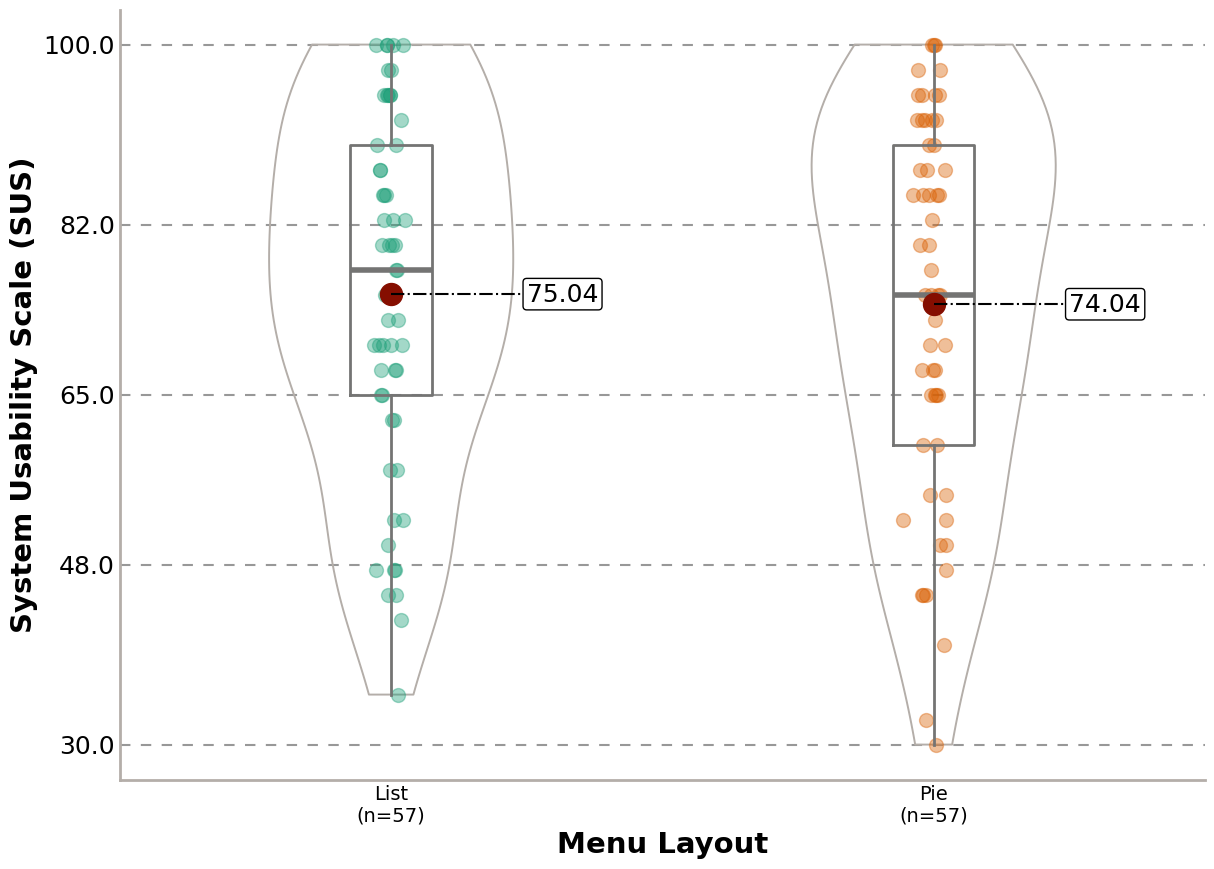

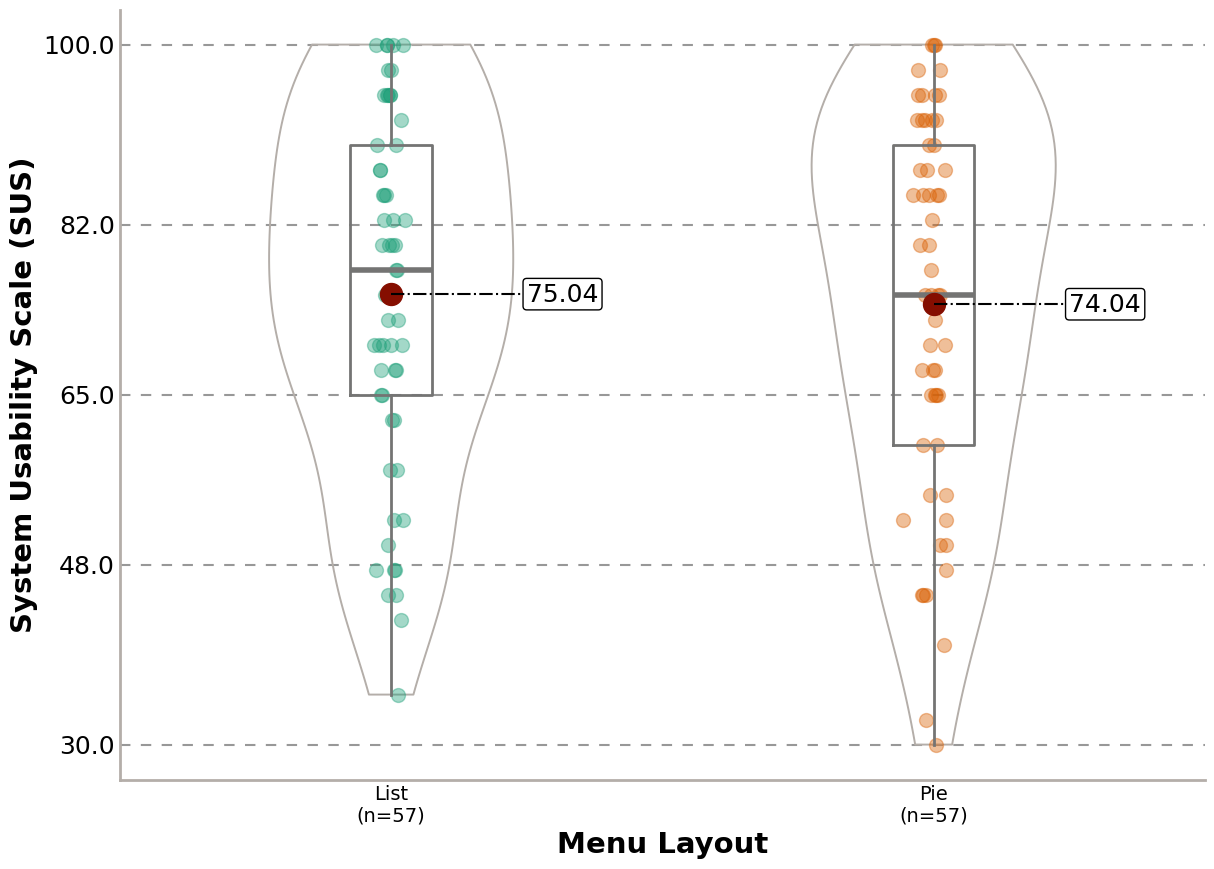

In [32]:
# Get the species, sorted alphabetically
species = (df_long_combinations["layout"].unique())

# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [df_long_combinations[df_long_combinations["layout"] == specie]["SUS"].values for specie in species]

xlabel = "Menu Layout"
ylabel = "System Usability Scale (SUS)"
    
stateval.make_plot(y_data, species, xlabel, ylabel, save_figure_as="plots/sus-layouts.png")

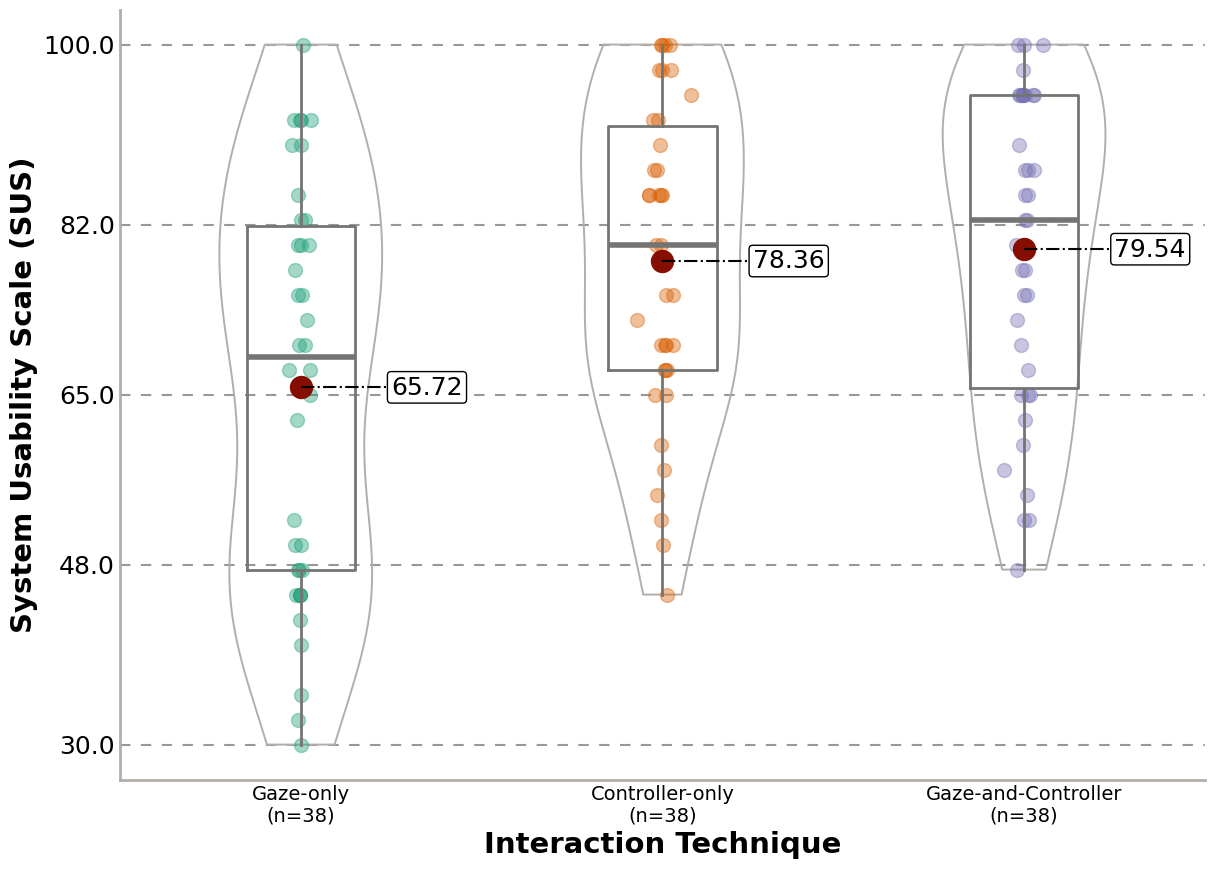

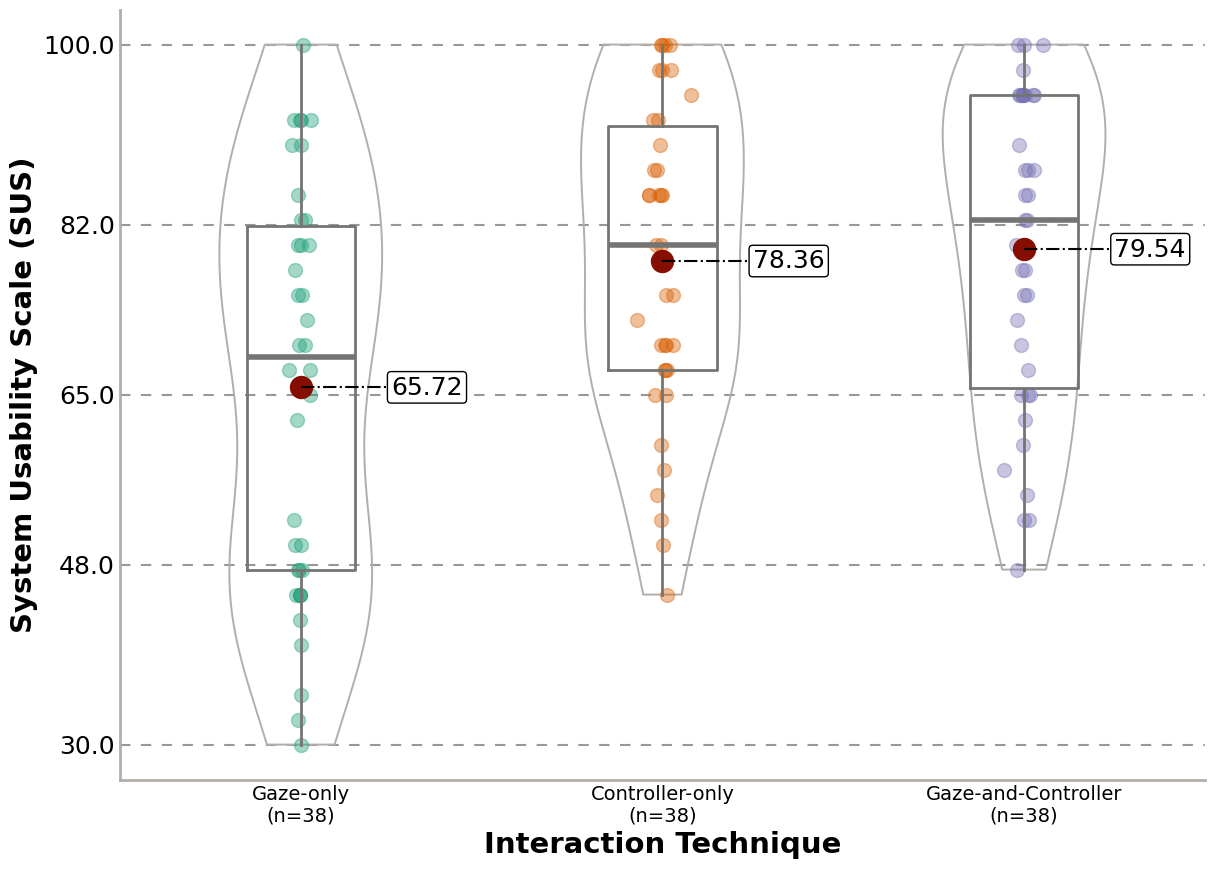

In [33]:
# Get the species, sorted alphabetically
species = (df_long_combinations["interaction"].unique())

# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [df_long_combinations[df_long_combinations["interaction"] == specie]["SUS"].values for specie in species]

xlabel = "Interaction Technique"
ylabel = "System Usability Scale (SUS)"
    
stateval.make_plot(y_data, species, xlabel, ylabel, save_figure_as="plots/sus-interaction.png")

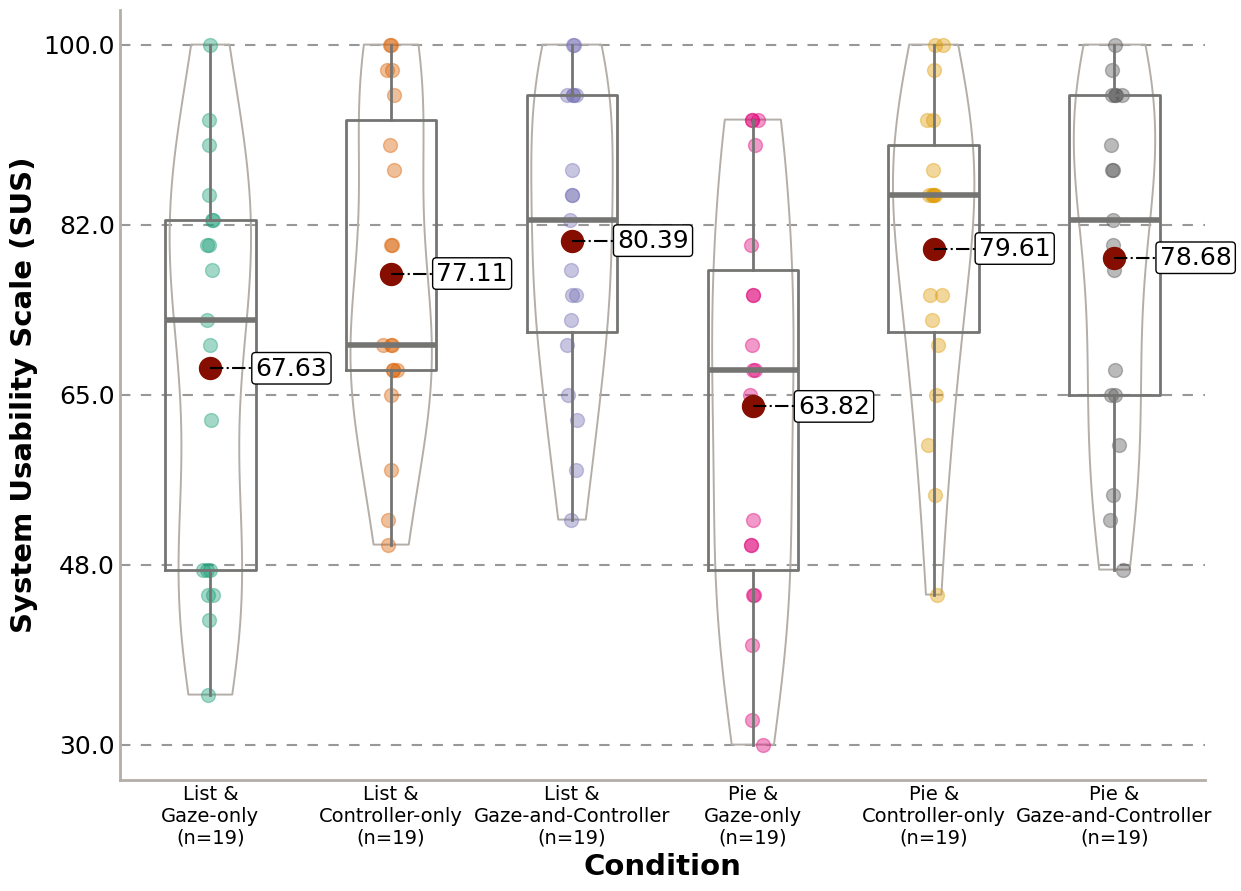

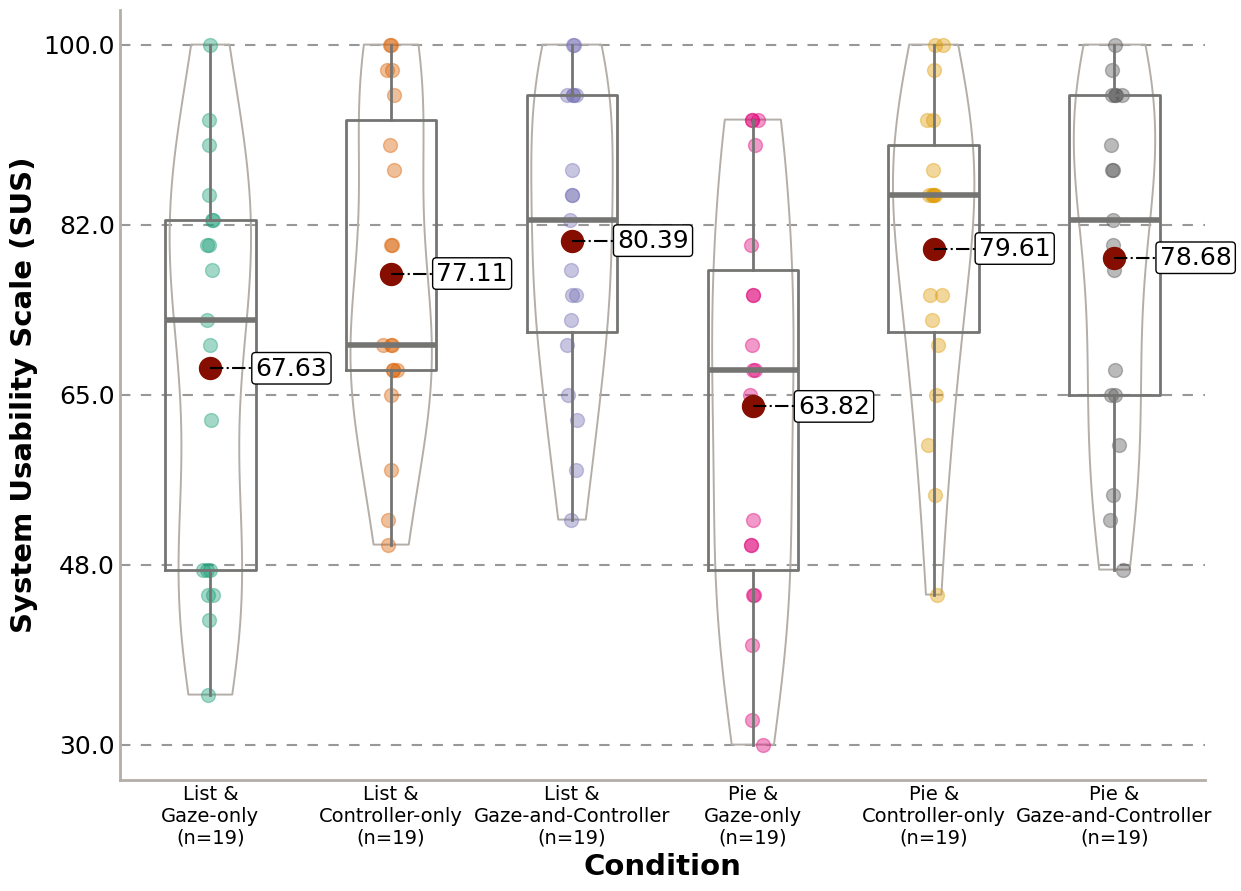

In [34]:
# Get the species, sorted alphabetically
species = (df_long_combinations["combination"].unique())

# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [df_long_combinations[df_long_combinations["combination"] == specie]["SUS"].values for specie in species]

xlabel = "Condition"
ylabel = "System Usability Scale (SUS)"
    
stateval.make_plot(y_data, species, xlabel, ylabel, save_figure_as="plots/sus-combination.png")